Universidad del Valle de Guatemala

Facultad de Ingeniería

Departamento de Ciencias de la Computación

CC3066 – Data Science

Cristian Eduardo Aguirre Duarte - 20231

## Parte 1

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

**Parte 1.1:** Cargue los datos en un DataFrame de Pandas

In [93]:
data = pd.read_csv('UK_foods.csv')
# Transponer el DataFrame para tener países como filas y alimentos como columnas
data = data.set_index('Unnamed: 0').T

**Parte 1.2:** Realice una exploración básica de los datos (estadísticas descriptivas)

In [94]:
data.head()

Unnamed: 0,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, England to N.Ireland
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cheese               4 non-null      int64
 1   Carcass_meat         4 non-null      int64
 2   Other_meat           4 non-null      int64
 3   Fish                 4 non-null      int64
 4   Fats_and_oils        4 non-null      int64
 5   Sugars               4 non-null      int64
 6   Fresh_potatoes       4 non-null      int64
 7   Fresh_Veg            4 non-null      int64
 8   Other_Veg            4 non-null      int64
 9   Processed_potatoes   4 non-null      int64
 10  Processed_Veg        4 non-null      int64
 11  Fresh_fruit          4 non-null      int64
 12  Cereals              4 non-null      int64
 13  Beverages            4 non-null      int64
 14  Soft_drinks          4 non-null      int64
 15  Alcoholic_drinks     4 non-null      int64
 16  Confectionery        

In [96]:
data.describe()

Unnamed: 0,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
count,4.000000,4.00,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,94.250000,245.25,706.000000,130.500000,205.250000,154.25000,798.250000,208.000000,457.750000,202.000000,349.000000,967.500000,1502.500000,57.500000,1427.000000,360.750000,55.250000
std,18.856917,16.50,93.427334,29.557853,22.366269,15.47848,200.755863,60.188592,92.471167,13.735599,15.769168,210.612599,54.659552,11.120552,140.612944,156.712848,10.436315
min,66.000000,227.00,586.000000,93.000000,184.000000,139.00000,566.000000,143.000000,355.000000,187.000000,334.000000,674.000000,1462.000000,47.000000,1256.000000,135.000000,41.000000
25%,93.750000,238.25,660.250000,114.750000,190.750000,145.00000,681.500000,164.000000,402.250000,195.250000,336.250000,886.250000,1469.500000,51.500000,1344.500000,315.000000,50.750000
50%,103.000000,243.50,717.500000,134.500000,201.000000,151.50000,797.000000,212.000000,453.000000,200.500000,348.500000,1029.500000,1483.000000,55.000000,1440.000000,416.500000,58.000000
75%,103.500000,250.50,763.250000,150.250000,215.500000,160.75000,913.750000,256.000000,508.500000,207.250000,361.250000,1110.750000,1516.000000,61.000000,1522.500000,462.250000,62.500000
max,105.000000,267.00,803.000000,160.000000,235.000000,175.00000,1033.000000,265.000000,570.000000,220.000000,365.000000,1137.000000,1582.000000,73.000000,1572.000000,475.000000,64.000000


**Parte 1.3:** Normalice los datos

In [97]:
normalizador = MinMaxScaler()
normalized_data = normalizador.fit_transform(data)

## Parte 2

In [98]:
# Construir el autocodificador
codificador = Sequential()
codificador.add(Dense(units=2, activation='relu', input_shape=[17]))
decodificador = Sequential()
decodificador.add(Dense(units=17, activation='relu', input_shape=[2]))
autocodificador = Sequential([codificador, decodificador])

# Compilar el autocodificador
autocodificador.compile(loss='mse', optimizer=SGD(lr=1.5))

# Entrenar el autocodificador
autocodificador.fit(normalized_data, normalized_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 215ms/step - loss: 0.3210
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3204
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3198
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3192
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3186
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3180
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3174
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3168
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3162
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3156
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3150
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3144
Epoch 13/100
1/1 [==============================] - 0s 5ms/

In [99]:
# Evaluar el rendimiento del autocodificador utilizando la pérdida de reconstrucción
loss = autocodificador.evaluate(normalized_data, normalized_data)
loss = loss * 100
print(f"Pérdida de reconstrucción: {loss:.2f} %")

1/1 [==============================] - 0s 60ms/step - loss: 0.2633
Pérdida de reconstrucción: 26.33 %


In [100]:
# Obtener las dos dimensiones reducidas
codificado_2dim = codificador.predict(normalized_data)

1/1 [==============================] - 0s 31ms/step


## Parte 3

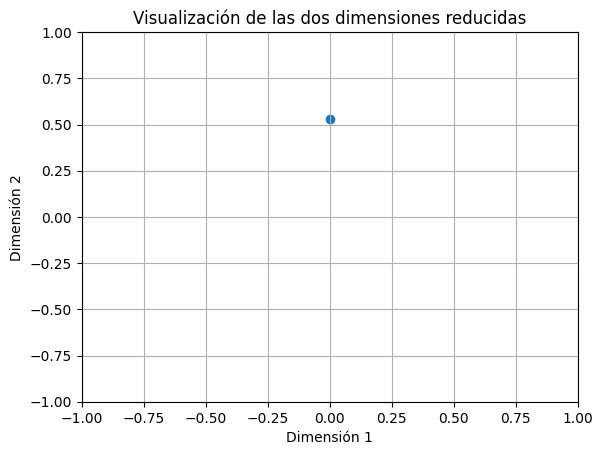

In [101]:
# Visualizar las dos dimensiones reducidas
plt.scatter(codificado_2dim[:, 0], codificado_2dim[:, 1])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.xlim(-1, 1)  # Ajusta los límites del eje X
plt.ylim(-1, 1)  # Ajusta los límites del eje Y
plt.title('Visualización de las dos dimensiones reducidas')
plt.grid(True)
plt.show()

# También puedes usar Plotly Express para una visualización interactiva
fig = px.scatter(x=codificado_2dim[:, 0], y=codificado_2dim[:, 1], width=700, height=500)
fig.show()

## Parte 4 

**4.1 ¿Qué podemos aprender sobre los patrones de consumo de alimentos en los cuatro países del Reino Unido?**

El primer punto (0, 0.528782) indica que un país (probablemente Escocia) tiene una coordenada positiva en la Dimensión 1 y una coordenada positiva en la Dimensión 2. Esto podría sugerir que este país tiene un patrón de consumo de alimentos diferente en comparación con los otros.

El segundo punto (1.591624, 0.1067735) indica que otro país (posiblemente Gales) tiene una coordenada positiva en la Dimensión 1 y una coordenada cercana a cero en la Dimensión 2. Esto podría sugerir que este país también tiene un patrón de consumo de alimentos distinto.

El tercer punto (1.682579, 0) muestra un país (quizás Inglaterra) con una coordenada positiva en la Dimensión 1 y una coordenada igual a cero en la Dimensión 2. Esto podría indicar que este país tiene un patrón de consumo particular en la Dimensión 1, pero similar a otros en la Dimensión 2.

El cuarto punto (1.95713, 0) representa otro país (posiblemente Irlanda del Norte) con coordenadas positivas en la Dimensión 1 y Dimensión 2 igual a cero. Esto podría indicar un patrón de consumo único en la Dimensión 1 pero similar a otros en la Dimensión 2.

**4.2 ¿El autocodificador hizo un buen trabajo al reducir la dimensionalidad? ¿Qué métricas de rendimiento apoyan su afirmación?**

El autocodificador ha reducido la dimensionalidad de manera efectiva a 2 dimensiones, por otra parte este modelo fue evaluado haciendo uso de la pérdida de reconstrucción, la cual mostró un resultado del 26.33 % que indica que hay cierto nivel de error en la reconstrucción, pero lo cual no indica necesariamente un mal rendimiento. Además con las visualizaciones podemos ver las representaciones de los 4 paises mostrados en el conjunto de datos de los cuales podemos determinar ciertas tendencias en los patrones de consumo de cada uno de ellos, por lo cual también es un indicador de la efectividad del modelo. 